In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ortho_group
from scipy.linalg import solve_triangular
import seaborn as sns

# A - Hand calculations

## Exercise 1

Given the tiny data-set 

\begin{center}
    \begin{tabular}{|l|lllll|}
        \hline$x$ & 8.1 & 10.0 & 11.2 & 12.7 & 13.0 \\
        \hline$y$ & 5.0 & 5.0 & 4.0 & 3.0 & 1.0 \\
        \hline
    \end{tabular}
\end{center}

### a. 

Use the linear regression model $y=\beta_0+\beta_1 x$ and show the steps from the model to the Normal equations. Calculate (use Python) $\operatorname{cond}_2(A)$ and $\operatorname{cond}_2\left(A^T A\right)$. 


**Answer:** Let $x = x_{1}, \ldots, x_{5}, y = y_{1}, \ldots, y_{5}$, the linear 
regression model gives us the following system of equations
\begin{align*}
    \begin{cases}
        y_1 = &\beta_0 + \beta_1 x_1 \\
        &\vdots \\
        y_5 = &\beta_1 + \beta_1 x_5 
    \end{cases}
    &\Rightarrow 
    \begin{pmatrix}
        1 & x_1 \\
        1 & x_2 \\
        1 & x_3 \\
        1 & x_4 \\
        1 & x_5 \\
    \end{pmatrix}
    \begin{pmatrix}
        \beta_0 \\
        \beta_1
    \end{pmatrix}
    = 
    \begin{pmatrix}
        y_1 \\
        y_2 \\
        y_3 \\
        y_4 \\
        y_5 \\
    \end{pmatrix} \\
    &\Rightarrow 
    \underbrace{
        \begin{pmatrix}
        1 & 8.1 \\
        1 & 10.0 \\
        1 & 11.2 \\
        1 & 12.7 \\
        1 & 13.0 \\
    \end{pmatrix}}_A
    \underbrace{
        \begin{pmatrix}
            \beta_0 \\
            \beta_1
        \end{pmatrix}}_\beta
    = 
    \underbrace{\begin{pmatrix}
        5.0 \\
        5.0 \\
        4.0 \\
        3.0 \\
        1.0 \\
    \end{pmatrix}}_y.
\end{align*}



With overdetermined equation systems, we can rarely find exact solutions. Indeed, the more 
overdetermined the system, the less likely it is to be solvable. We can find an approximate
solution with least squares by projecting $y$ onto $\mathbb{C}(A)$ with the normal equations
$A^TA \beta = A^T y$.

In [2]:
A = np.matrix([[1, 8.1], [1, 10.0], [1, 11.2], [1, 12.7], [1, 13.0]])
print(f'Condition number of matrix A: {np.linalg.cond(A)}')
print(f'Condition number of matrix A^T*A: {np.linalg.cond(A.T@A)}')

Condition number of matrix A: 69.28012237225526
Condition number of matrix A^T*A: 4799.735355915177


### b.

Repeat a) but use the model
$$
y=\beta_0+\beta_1 \frac{x-\bar{x}}{\sigma(x)}
$$
where $\bar{x}$ is the mean (over $x$ ) and $\sigma(x)$ is the standard deviation. 
(This is commonly used as data scaling, especially when working with multiple linear regression and there 
 are different scales in the data set. It is a way transforming data to the same scale. But it has other 
 effects too as you can see).

**Answer:** We first calculate $\Bar{x} \: \text{and} \: \sigma(x)$:
$$
\Bar{x} = \frac{1}{n} \sum_{i=1}^n x_i = \frac{1}{5} (8.1 + 10.0 + 11.2 + 12.7 + 13.0) = 11,
$$

\begin{align*}
    &\sigma(x) = \sqrt{\frac{\sum_{i=1}^n (x_i - \Bar{x})^2 }{n-1}} \\
    &= \sqrt{\frac{(8.1-11)^2 + (10.0 - 11)^2 + (11.2 - 11)^2 + (12.7 - 11)^2 + (13.0 - 11)^2}{4}} \\
    &= 2.02.
\end{align*}

With these values, we get that 
\begin{align*}
    A_{12} &= \frac{8.1 - 11}{2.02} = -1.436 \\
    A_{22} &= \frac{10.0 - 11}{2.02} = -0.495 \\
    A_{32} &= \frac{11.2 - 11}{2.02} =  0.594 \\
    A_{42} &= \frac{12.7 - 11}{2.02} = 0.842 \\
    A_{52} &= \frac{13.0 - 11}{2.02} = 0.990,
\end{align*}

and 

$$
A = 
\begin{pmatrix}
    1 & -1.436 \\
    1 & -0.495 \\
    1 & 0.594 \\
    1 & 0.842 \\
    1 & 0.990 \\
\end{pmatrix}.
$$

In [3]:
A = np.matrix([[1, -1.436], [1, -0.495], [1, 0.594], [1, 0.842], [1, 0.990]])
print(f'Condition number of matrix A: {np.linalg.cond(A)}')
print(f'Condition number of matrix A^T*A: {np.linalg.cond(A.T@A)}')

Condition number of matrix A: 1.1358945974120829
Condition number of matrix A^T*A: 1.290256536429958


## Exercise 2

What is the condition number, $\operatorname{cond}_2(Q)$ of an orthogonal matrix $Q$ ? Check it in Python, 
and try to prove that the result is valid for any orthogonal matrix.

In [4]:
Q = ortho_group.rvs(dim=3) # Generate random orthogonal matrix 
QTQ = Q.T@Q # Q^T * Q
print(QTQ) # Check that it is the identity matrix
print(f'Condition number of matrix Q^T*Q: {np.linalg.cond(QTQ)}')

[[ 1.00000000e+00  2.67147415e-16  5.55111512e-17]
 [ 2.67147415e-16  1.00000000e+00 -1.82145965e-17]
 [ 5.55111512e-17 -1.82145965e-17  1.00000000e+00]]
Condition number of matrix Q^T*Q: 1.0000000000000002


*Proof.* We have that $\text{cond}_2(Q) = ||Q||_2 \cdot ||Q^{-1}||_2$, where the 2-norm has the property 
that $||Q||_2 = \sqrt{\lambda_{max}(Q^TQ)}$. If $Q$ is an 
orthogonal matrix then it fulfills the following two properties:
\begin{itemize}
    \item $Q^{-1} = Q^T$,
    \item $Q^TQ = QQ^T = I$, where $I$ is the identity matrix.
\end{itemize} 
Thus,
\begin{align*}
    \text{cond}_2(Q) &= ||Q||_2 \cdot ||Q^{-1}||_2 = ||Q||_2 \cdot ||Q^{T}||_2 \\
    &= \sqrt{\lambda_{max}(Q^TQ)} \cdot \sqrt{\lambda_{max}(QQ^T)} \\
    &= \sqrt{\lambda_{max}(I)} \cdot \sqrt{\lambda_{max}(I)} \\
    &= \sqrt{1} \cdot \sqrt{1} \\
    &= 1. \quad \quad \quad \quad \square
\end{align*} 

# B - Software calculations

## Exercise 3

In [5]:
df = pd.read_csv(r'LifeExpectancyData.csv')

In [6]:
analysis = df[['Life expectancy ', 'Schooling']]
analysis

,Life expectancy,Schooling
0,65.0,10.1
1,59.9,10.0
2,59.9,9.9
3,59.5,9.8
4,59.2,9.5
...,...,...
2933,44.3,9.2
2934,44.5,9.5
2935,44.8,10.0
2936,45.3,9.8


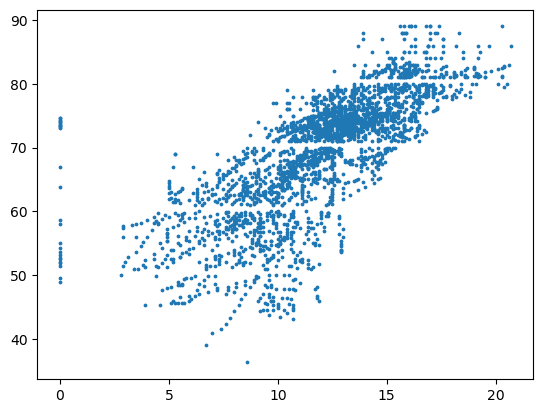

In [7]:
x_unfiltered = analysis["Schooling"].to_numpy()
y_unfiltered = analysis["Life expectancy "].to_numpy()

# Drop nan from x where both x and y are nan
x = x_unfiltered[~(np.isnan(x_unfiltered) | np.isnan(y_unfiltered))]

# Drop nan from y where both x and y are nan
y = y_unfiltered[~(np.isnan(x_unfiltered) | np.isnan(y_unfiltered))]

plt.scatter(x,y, s=3)
plt.show()

### b.
Analyze the dependency between life expectancy and schooling. Use quadratic
regression, the model $y = \beta_0 + \beta_1 x + \beta_2 x^2$, where schooling is the dependent
variable (x) and life expectancy the dependent variable (y).
Solve the least squares problem in two different ways, by forming and solving the
normal equations ($A^TA\hat{x} = A^T y$) and also via QR-decomposition, respectively.
Plot the polynomials together with the data set (use e.g. **numpy.polyval** in
Python to evaluate the polynomial).

**Answer:** Using the normal equations:

In [8]:
A = np.vander(x, 3, increasing=True) 
A

array([[  1.  ,  10.1 , 102.01],
       [  1.  ,  10.  , 100.  ],
       [  1.  ,   9.9 ,  98.01],
       ...,
       [  1.  ,  10.  , 100.  ],
       [  1.  ,   9.8 ,  96.04],
       [  1.  ,   9.8 ,  96.04]])

In [9]:
x_NE = np.linalg.solve(A.T@A, A.T@y)
x_NE

array([51.86257553,  0.54042781,  0.07089593])

Next, using QR-decomposition:

In [10]:
Q, R = np.linalg.qr(A, mode="reduced")

print(Q)
print(R)

[[-0.01900715 -0.01079154 -0.01214098]
 [-0.01900715 -0.01135962 -0.01193172]
 [-0.01900715 -0.01192771 -0.01170097]
 ...
 [-0.01900715 -0.01135962 -0.01193172]
 [-0.01900715 -0.01249579 -0.01144872]
 [-0.01900715 -0.01249579 -0.01144872]]
[[  -52.61178575  -631.32242187 -8164.60977063]
 [    0.           176.03039408  3880.89904321]
 [    0.             0.           930.32667422]]


In [11]:
x_QR = solve_triangular(R, Q.T@y)
x_QR

array([51.86257553,  0.54042781,  0.07089593])

In [12]:
model = A @ x_QR

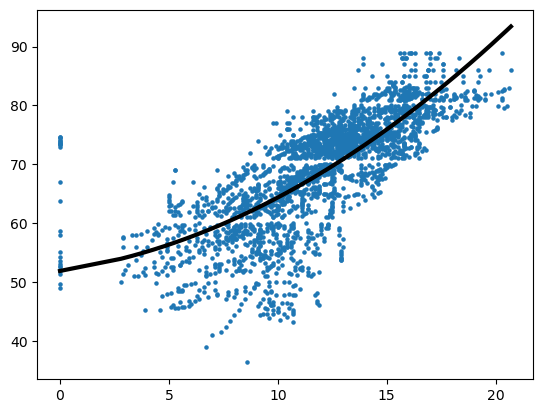

In [13]:
permut = x.argsort() # Obtain sorted permutation for line plot
plt.plot(x[permut], model[permut], color="black", linewidth=3)
plt.scatter(x,y, s=5)
plt.show()

### c.

Calculate the condition number of the matrix $A$ and $A^TA$, respectively. 
In a worst case scenario, how much accuracy would we lose in the normal equation solution, $\hat{x}_{NE}$?

If we consider the QR-decomposition solution $\hat{x}_{QR}$ to be "exact", we can compare the two solutions, the 
relative error $||\hat{x}_{QR} - \hat{x}_{NE}||/||\hat{x}_{QR}||$, to get an idea of the actual accuracy in 
$\hat{x}_{NE}$.

Do this and compare with the worst-case scenario. Note, no error at all is equivalent to relative error
$\approx 10^{-16}$, due to roundoff errors in the computations.

**Answer:**

In [14]:
print(f'Condition number of matrix A: {np.linalg.cond(A)}')
print(f'Condition number of matrix A^TA: {np.linalg.cond(A.T@A)}')

Condition number of matrix A: 1267.820078736955
Condition number of matrix A^TA: 1607367.7520410533


In [15]:
x_QR_norm = np.linalg.norm(x_QR)
x_NE_norm = np.linalg.norm(x_NE)
relative_error = (x_QR_norm - x_NE_norm)/x_QR_norm
print(f'Relative error: {relative_error}')

Relative error: 4.890805099137545e-14


In the worst-case scenario we get that perturbation in input data is magnified by $1.6 \cdot 10^6$, when comparing 
the two methods we get a relative error of $4.9 \cdot 10^{-14}$.

### d.

Finally, create a histogram of the residual, $y - A\hat{x}$. Don’t use too few bins in the
histogram, choose for example 200 bins.
The difference between any data point and the regression line can be expressed
with the residual. If it is correct the residual should roughly follow a normal
distribution. Does it seem to be correct here?

**Answer:**

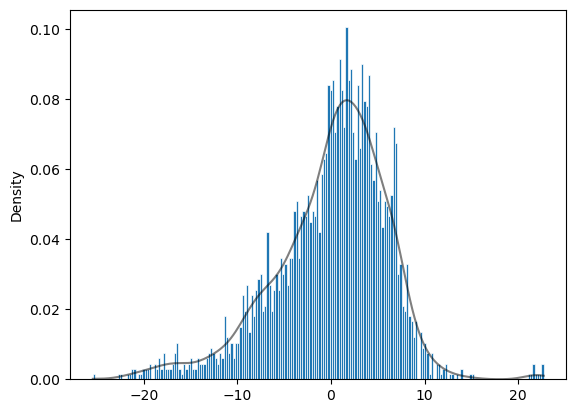

In [16]:
res = y - A @ x_QR

# Plot seaborn histogram overlaid with KDE
ax = sns.histplot(data=res, bins=200, stat='density', alpha= 1, kde=True,
                  edgecolor='white', linewidth=0.5,
                  line_kws=dict(color='black', alpha=0.5, linewidth=1.5, label='KDE'))
ax.get_lines()[0].set_color('black') # edit line color due to bug in sns v 0.11.0

plt.show()


**Conclusion:** the residual roughly follows a normal distribution, so it seems to be correct.

## Exercise 4

A “theoretical” question linked to exercise 3 above. How “big”, i.e. what
dimensions, do the subspaces $\mathbb{C}(A)$ and $\mathbb{N}(A^T)$, respectively, have in the problem above? 

**Answer:** 

In [17]:
A.shape

(2768, 3)

In [18]:
np.linalg.matrix_rank(A)

3

A is a $2768 \times 3$ matrix of rank 3. Thus, 
$\mathbb{C}(A), \mathbb{N}(A^T) \in \mathbb{R}^M,$
$\mathbb{C}(A) = 3,$ and $\mathbb{N}(A^T) = 2768 - \mathbb{C}(A) = 2768 - 3 = 2765.$